# Projekt końcowy

## Część 1 - obróbka danych

In [426]:
# EDA packages
import pandas as pd
import numpy as np
import datetime
pd.set_option("display.max_columns", None)

In [427]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [428]:
# ML Packages

In [490]:
# Importing data
df = pd.read_csv("Loan_data.csv", skipinitialspace = True, low_memory = False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingc...,Borrower added...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Aug-2018,739.0,735.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingc...,Borrower added...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ year

In [491]:
# Getting to know data
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12020.189644,11312.729377,9675.675936,2239.981444,1.516890,103.015467,14.387843,2613.245652,689.922511,676.952039,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.685888,9038.506549,7105.750304,2585.057393,7.830064,735.799086,162.177837,4385.066535,80.818099,119.647752,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [492]:
# Getting to know data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [493]:
# Checking dataset size
df.shape

(42536, 151)

In [494]:
# Checking missing values
df.isna().sum().sort_values(ascending = False)

inq_fi                            42536
mths_since_recent_revol_delinq    42536
open_acc_6m                       42536
tot_cur_bal                       42536
tot_coll_amt                      42536
                                  ...  
last_fico_range_low                   1
dti                                   1
addr_state                            1
zip_code                              1
id                                    0
Length: 151, dtype: int64

In [495]:
# Deleting columns containing only missing values
df.dropna(axis = 1, how = 'all', inplace = True)

In [496]:
# Checking missing values
df.isna().sum().sort_values(ascending = False)

settlement_term          42376
settlement_percentage    42376
settlement_amount        42376
settlement_date          42376
settlement_status        42376
                         ...  
total_pymnt_inv              1
total_rec_prncp              1
total_rec_int                1
pymnt_plan                   1
id                           0
Length: 69, dtype: int64

In [497]:
# Deleting columns containing one unique value
df.drop(columns = df.columns[df.nunique() == 1], inplace = True)

In [498]:
df.shape

(42536, 59)

In [499]:
# Getting to know data
df.describe(include = 'all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,42536,42535.000000,42535.000000,42535.000000,42535,42535,42535.000000,42535,42535,39909,41423,42535,4.253100e+04,42535,42535,42535,42535,29242,42535,42522,42535,42535,42535.000000,42506.000000,42506,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42445,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42452,42535.000000,2749,42531,42535.000000,42535.000000,42506.000000,42506.000000,41170.000000,42430.000000,42535,160,160,160,160.000000,160.000000,160.000000
unique,42536,NaN,NaN,NaN,2,394,NaN,7,35,30658,11,5,NaN,3,55,4,42535,28963,14,21264,837,50,NaN,NaN,530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,NaN,98,133,NaN,NaN,NaN,NaN,NaN,NaN,2,63,3,61,NaN,NaN,NaN
top,1077501,NaN,NaN,NaN,36 months,10.99%,NaN,B,B3,US Army,10+ years,RENT,NaN,Not Verified,Dec-2011,Fully Paid,https://lendingc...,,debt_consolidation,Debt Consolidation,100xx,CA,NaN,NaN,Oct-1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-2013,NaN,Mar-2011,Aug-2018,NaN,NaN,NaN,NaN,NaN,NaN,N,Jun-2017,COMPLETE,Sep-2013,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,31534,970,NaN,12389,2997,139,9369,20181,NaN,18758,2267,34116,1,225,19776,2259,649,7429,NaN,NaN,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070,NaN,107,9248,NaN,NaN,NaN,NaN,NaN,NaN,42375,18,142,8,NaN,NaN,NaN
mean,NaN,11089.722581,10821.585753,10139.938785,NaN,NaN,322.623063,NaN,NaN,NaN,NaN,NaN,6.913656e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.373043,0.152449,NaN,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,NaN,22.124406,12020.189644,11312.729377,9675.675936,2239.981444,1.516890,103.015467,14.387843,NaN,2613.245652,NaN,NaN,689.922511,676.952039,0.000094,0.143039,0.045227,0.000024,NaN,NaN,NaN,NaN,4272.137875,49.905875,1.200000
std,NaN,7410.938391,7146.914675,7131.598014,NaN,NaN,208.927216,NaN,NaN,NaN,NaN,NaN,6.409635e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.726315,0.512406,NaN,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,NaN,11.592811,9094.685888,9038.506549,7105.750304,2585.057393,7.830064,735.799086,162.177837,NaN,4385.066535,NaN,NaN,80.818099,119.647752,0.009700,29.359579,0.208737,0.004855,NaN,NaN,NaN,NaN,3119.373774,15.563690,4.085255
min,NaN,500.000000,500.000000,0.000000,NaN,NaN,15.670000,NaN,NaN,NaN,NaN,NaN,1.896000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,NaN,NaN,165.520000,NaN,NaN,NaN,NaN,NaN,4.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000,0.000000,NaN,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,NaN,13.000000,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,0.000000,NaN,211.050000,NaN,NaN,644.000000,640.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1842.750000,40.0

In [500]:
# Values in this column start with space - deleting leading space
df["term"]  = df["term"].str.strip()

In [501]:
# Values in these columns contain % - deleting % sign and changing column type from object to float
df["revol_util"]  = df["revol_util"].str.replace("%","")
df["revol_util"] = pd.to_numeric(df.revol_util)
df["int_rate"]  = df["int_rate"].str.replace("%","")
df["int_rate"] = pd.to_numeric(df.int_rate)

In [502]:
# Convert last_credit_pull_d column type from object to date
df["last_credit_pull_d"] = pd.to_datetime(df.last_credit_pull_d)

In [503]:
# Convert issue_d column type from object to date
df["issue_d"] = pd.to_datetime(df.issue_d)

In [504]:
# Convert earliest_cr_line column type from object to date
df["earliest_cr_line"] = pd.to_datetime(df.earliest_cr_line)

In [505]:
# Deleting columns containing data not known at the moment of loan granting (for example total_pymnt, last_fico_range_low) or unnecesary data (for example url, zip_code).
# I was not sure how to handle funded_amnt, funded_amnt_inv and int_rate columns as they seem to contain information from the future, after the decision to give a loan is made).
# However, for feature engineering purposes I decided to keep them in database.
df.drop(columns = ["desc", "url", "title", "zip_code", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_fico_range_low", "last_fico_range_high", "debt_settlement_flag","debt_settlement_flag_date", "settlement_status", "settlement_date", "settlement_amount", "settlement_percentage", "settlement_term"], inplace = True)

In [506]:
# Checking dataset size after changes
df.shape

(42536, 36)

In [507]:
# Taking a look at values in loan_status column
df.groupby("loan_status").size()

loan_status
Charged Off                                             5670
Does not meet the credit policy. Status:Charged Off      761
Does not meet the credit policy. Status:Fully Paid      1988
Fully Paid                                             34116
dtype: int64

In [508]:
# Deleting rows that don’t contain 'Fully Paid' or 'Charged Off' as the loan’s status
df.drop(df[df.loan_status == "Does not meet the credit policy. Status:Charged Off"].index, inplace = True)
df.drop(df[df.loan_status == "Does not meet the credit policy. Status:Fully Paid"].index, inplace = True)
df.shape

(39787, 36)

In [509]:
# Checking missing values
df.isna().sum().sort_values(ascending = False)

mths_since_last_record    36996
mths_since_last_delinq    25728
emp_title                  2468
emp_length                 1079
pub_rec_bankruptcies        698
revol_util                   51
tax_liens                    40
last_credit_pull_d            3
total_acc                     1
revol_bal                     1
delinq_2yrs                   1
pub_rec                       1
open_acc                      1
acc_now_delinq                1
delinq_amnt                   1
inq_last_6mths                1
fico_range_high               1
fico_range_low                1
earliest_cr_line              1
dti                           1
loan_amnt                     1
addr_state                    1
purpose                       1
loan_status                   1
issue_d                       1
verification_status           1
annual_inc                    1
home_ownership                1
sub_grade                     1
grade                         1
installment                   1
int_rate

In [510]:
# It seems that one row contains missing data in all columns
df[df.loan_status.isna()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
39786,Loans that do no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [511]:
# Deleting this row
df.drop(df[df.loan_status.isna()].index, inplace = True)

In [512]:
# Checking missing values again
df.isna().sum().sort_values(ascending = False)

mths_since_last_record    36995
mths_since_last_delinq    25727
emp_title                  2467
emp_length                 1078
pub_rec_bankruptcies        697
revol_util                   50
tax_liens                    39
last_credit_pull_d            2
total_acc                     0
revol_bal                     0
delinq_2yrs                   0
pub_rec                       0
open_acc                      0
acc_now_delinq                0
delinq_amnt                   0
inq_last_6mths                0
fico_range_high               0
fico_range_low                0
earliest_cr_line              0
id                            0
loan_amnt                     0
addr_state                    0
purpose                       0
loan_status                   0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
sub_grade                     0
grade                         0
installment                   0
int_rate

In [513]:
# Handling missing values in columns: mths_since_last_record, mths_since_last_delinq, emp_length, pub_rec_bankruptcies, revol_util tax_liens, last_credit_pull_d

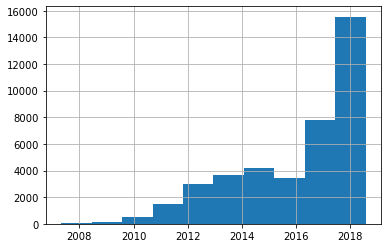

In [514]:
# last_credit_pull_d 
# Checking revol_util distribution and observations with missing values
df.last_credit_pull_d.hist()
# It turns out that this column also contains future data that was not available when the loans were granted (loans were granted between 2007 and 2011). I decided to exclude this column from analysis.
df.drop(columns = "last_credit_pull_d", inplace = True)

In [515]:
# tax_liens
# tax_liens column has only 0.0 and missing values therefore I decided to delete this column as it doesn't contain any useful information
df.drop(columns = "tax_liens", inplace = True)

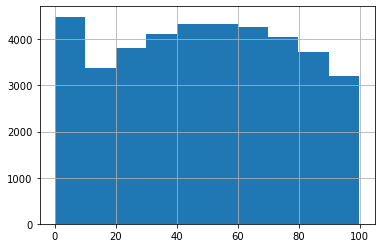

In [516]:
# revol_util
# Checking revol_util distribution
df.revol_util.hist()
# Replacing missing values with mean
df.revol_util.fillna(df.revol_util.mean(), inplace = True)

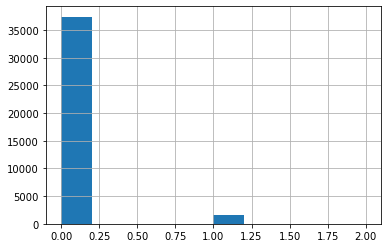

In [517]:
# pub_rec_bankruptcies
# Checking pub_rec_bankruptcies distribution
df.pub_rec_bankruptcies.hist()
# It seems that most of observations have 0 pub_rec_bankruptcies, therefore median seems to be the best value to replace missing values with is median
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median(), inplace = True)

<AxesSubplot:>

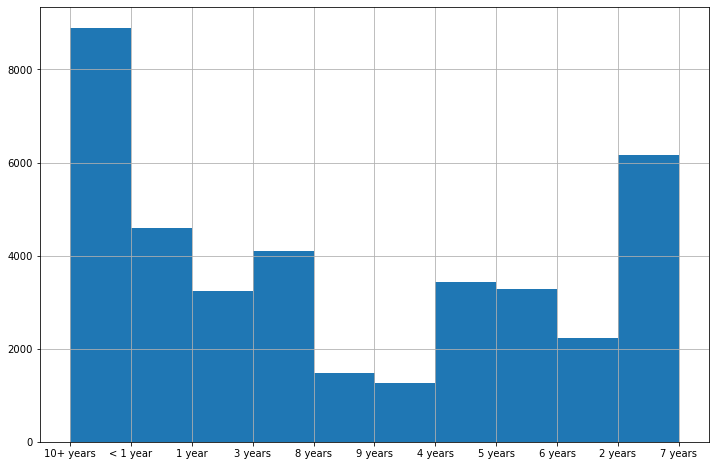

In [539]:
# emp_length
# Checking emp_length distribution
df.emp_length.hist(figsize = (12,8))
# Based on histogram it is difficult to decide how to replace missing values in this case. Checking relationship between emp_length and loan_status.

In [550]:
# We can see that for different emp_length, loan charge off rates are similar. This feature does not seem to have impact on loan_status.
for year in df.emp_length.unique():
    print(year)
    print(df[df.emp_length == year].loan_status.value_counts(normalize = True))

10+ years
Fully Paid     0.848522
Charged Off    0.151478
Name: loan_status, dtype: float64
< 1 year
Fully Paid     0.860349
Charged Off    0.139651
Name: loan_status, dtype: float64
1 year
Fully Paid     0.858331
Charged Off    0.141669
Name: loan_status, dtype: float64
3 years
Fully Paid     0.863836
Charged Off    0.136164
Name: loan_status, dtype: float64
8 years
Fully Paid     0.861279
Charged Off    0.138721
Name: loan_status, dtype: float64
9 years
Fully Paid     0.873709
Charged Off    0.126291
Name: loan_status, dtype: float64
4 years
Fully Paid     0.864692
Charged Off    0.135308
Name: loan_status, dtype: float64
5 years
Fully Paid     0.860316
Charged Off    0.139684
Name: loan_status, dtype: float64
6 years
Fully Paid     0.861497
Charged Off    0.138503
Name: loan_status, dtype: float64
2 years
Fully Paid     0.87005
Charged Off    0.12995
Name: loan_status, dtype: float64
7 years
Fully Paid     0.851831
Charged Off    0.148169
Name: loan_status, dtype: float64
nan
Series

In [571]:
# However, loans where emp_length is missing have higher charged off rate. It seems that missing values in emp_length column could mean that somebody was not employed (was a student or not working at all).
missing_emp_length = df[df["emp_length"].isnull()]
missing_emp_length.loan_status.value_counts(normalize = True)

Fully Paid     0.786642
Charged Off    0.213358
Name: loan_status, dtype: float64

In [572]:
# Therefore, for now I decided to replace missing values to 0 years to explore its impact on dependent variable in more detail during EDA. 
# Later I will decide whether such missing values replacement was correct and whether to keep emp_length among features for modelling.
df.emp_length.fillna(0, inplace = True)

In [592]:
# emp_title
print(df.emp_title.nunique())
print(df.emp_title.isna().sum()/df.shape[0])
# There are too many unique values of emp_title. This column also contains 6% missing values. I decided to delete this column from data.
df.drop(columns = "emp_title", inplace = True)

AttributeError: 'DataFrame' object has no attribute 'emp_title'

In [ ]:
# Czy mths_since_last_record i mths_since_last_delinq usunac cale kolumny skoro zawieraja tak duzo NaN czy uzupelnic srednimi?

In [573]:
# Checking missing values again
df.isna().sum().sort_values(ascending = False)

mths_since_last_record    36995
mths_since_last_delinq    25727
emp_title                  2467
id                            0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
dti                           0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
acc_now_delinq                0
delinq_amnt                   0
delinq_2yrs                   0
addr_state                    0
loan_amnt                     0
purpose                       0
loan_status                   0
issue_d                       0
verification_status           0
annual_inc                    0
home_ownership                0
emp_length                    0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
term                          0
funded_a

In [174]:
# Last look at the final dataset
df.describe(include = 'all')

,loan_amnt,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
count,39786.000000,39786,39786.000000,39786,39786,38708,39786,3.978600e+04,39786,39786,39786,39786,39786.000000,39786.000000,39786.000000,39786.000000,39786.000000,14059.000000,2791.000000,39786.000000,39786.000000,39786.000000,39736,39786.000000,39786.000000,39786.000000,39786.0,39786.0,39089.000000
unique,NaN,2,NaN,7,35,11,5,NaN,3,2,14,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1089,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,36 months,NaN,B,B3,10+ years,RENT,NaN,Not Verified,Fully Paid,debt_consolidation,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,29096,NaN,12035,2924,8899,18918,NaN,16926,34116,18676,7105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,980,NaN,NaN,NaN,NaN,NaN,NaN
mean,11231.360277,NaN,324.733637,NaN,NaN,NaN,NaN,6.897907e+04,NaN,NaN,NaN,NaN,13.317794,0.146534,714.997989,718.997989,0.869049,35.901913,69.747402,9.294023,0.055145,13391.983914,NaN,22.090308,692.135425,679.776555,0.0,0.0,0.043286
std,7464.542832,NaN,208.923212,NaN,NaN,NaN,NaN,6.376263e+04,NaN,NaN,NaN,NaN,6.678300,0.491826,35.840682,35.840682,1.070069,22.017895,43.805070,4.399997,0.237653,15894.635107,NaN,11.401620,80.345075,117.263455,0.0,0.0,0.204381
min,500.000000,NaN,15.690000,NaN,NaN,NaN,NaN,4.000000e+03,NaN,NaN,NaN,NaN,0.000000,0.000000,625.000000,629.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,NaN,2.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,5500.000000,NaN,167.080000,NaN,NaN,NaN,NaN,4.050000e+04,NaN,NaN,NaN,NaN,8.180000,0.000000,685.000000,689.000000,0.000000,18.000000,22.500000,6.000000,0.000000,3704.250000,NaN,13.000000,644.000000,640.000000,0.0,0.0,0.000000
50%,10000.000000,NaN,280.610000,NaN,NaN,NaN,NaN,5.900000e+04,NaN,NaN,NaN,NaN,13.410000,0.000000,710.000000,714.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8859.500000,NaN,20.000000,704.000000,700.000000,0.0,0.0,0.000000
75%,15000.000000,NaN,430.780000,NaN,NaN,NaN,NaN,8.234250e+04,NaN,NaN,NaN,NaN,18.600000,0.000000,740.000000,744.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17065.000000,NaN,29.000000,749.000000,745.000000,0.0,0.0,0.000000


## Część 3 - Feature Engineering

In [ ]:
# average fico score
# stosunek kwoty wnioskowanej do otrzymanej
# długość opisu
# earliest cr line == issue_d - czy jak ktos zaciagnal ja pierwszy raz to znaczy, ze wieksza szansa na splate